In [1]:
import networkx as nx
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

In [3]:
nw = "Real_world_data/Oregon_router_networks/nw9_May_26.txt"
G = nx.read_edgelist(nw, nodetype=int)
degrees = [d for n, d in G.degree()]
first_moment = sum(degrees) / len(degrees)
second_moment = sum(d**2 for d in degrees) / len(degrees)
lambda_c = first_moment / (second_moment - first_moment)
lambda_c

0.003779347092724858

In [2]:
def network_SISD(g, N, beta_1, beta_2, beta_3, gamma, delta, mu, S0, I0, max_time):
    pop_size = S0 + I0
    
    i_nodes = list(range(N))
    for i in range(N):
        i_node = random.choice(i_nodes)
        i_nodes.remove(i_node)

        if (i < math.floor(S0/pop_size * N)):
            g.nodes[i_node]['state'] = 'S'
        else:
            g.nodes[i_node]['state'] = 'I1'

    S = len([x for x,y in g.nodes(data=True) if y['state']=='S'])
    I1 = len([x for x,y in g.nodes(data=True) if y['state']=='I1'])
    I2 = len([x for x,y in g.nodes(data=True) if y['state']=='I2'])
    I3 = len([x for x,y in g.nodes(data=True) if y['state']=='I3'])
    D = len([x for x,y in g.nodes(data=True) if y['state']=='D'])
    states = [(0, S/N, I1/N, I2/N, I3/N, D/N)]

    strain_2_time = None
    strain_3_time = None
    S_at_2, I1_at_2, I2_at_2 = None, None, None
    S_at_3, I1_at_3, I2_at_3, I3_at_3 = None, None, None, None

    for t in range(max_time):
        for node in g.nodes():
            all_neighbors = list(g.neighbors(node))
            neighbors = [n for n in all_neighbors if g.nodes[n]['state'] != 'D']
            if neighbors:
                contact = random.choice(neighbors)
            else:
                contact = None
            if g.nodes[node]['state'] == 'S':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            S -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            S -= 1
                            I2 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            S -= 1
                            I3 += 1
            elif g.nodes[node]['state'] == 'I1':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            I1 -= 1
                            I2 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            I1 -= 1
                            I3 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I1 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I1 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I2'
                        I1 -= 1
                        I2 += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I1 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I1 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I2'
                        I1 -= 1
                        I2 += 1
            elif g.nodes[node]['state'] == 'I2':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            I2 -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I3'):
                        if random.random() < beta_3:
                            g.nodes[node]['state'] = 'I3'
                            I2 -= 1
                            I3 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I2 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I2 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I3'
                        I2 -= 1
                        I3 += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I2 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I2 -= 1
                        D += 1
                    elif random.random() < mu:
                        g.nodes[node]['state'] = 'I3'
                        I2 -= 1
                        I3 += 1
            elif g.nodes[node]['state'] == 'I3':
                if contact is not None:
                    if (g.nodes[contact]['state'] == 'I1'):
                        if random.random() < beta_1:
                            g.nodes[node]['state'] = 'I1'
                            I3 -= 1
                            I1 += 1
                    elif (g.nodes[contact]['state'] == 'I2'):
                        if random.random() < beta_2:
                            g.nodes[node]['state'] = 'I2'
                            I3 -= 1
                            I2 += 1
                    elif random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I3 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I3 -= 1
                        D += 1
                else:
                    if random.random() < gamma:
                        g.nodes[node]['state'] = 'S'
                        I3 -= 1
                        S += 1
                    elif random.random() < delta:
                        g.nodes[node]['state'] = 'D'
                        I3 -= 1
                        D += 1
        states.append((t+1, S/N, I1/N, I2/N, I3/N, D/N))
    
        if strain_2_time is None and I2 > 0:
            strain_2_time = t
            S_at_2 = S
            I1_at_2 = I1
            I2_at_2 = 1 / N  # Assuming one individual triggers strain 2
        if strain_3_time is None and I3 > 0:
            strain_3_time = t
            S_at_3 = S
            I1_at_3 = I1
            I2_at_3 = I2
            I3_at_3 = 1 / N  # Assuming one individual triggers strain 3

    # # Use the states at strain 2 and strain 3 emergence
    # if strain_2_time is not None:
    #     S_at_2 = S[strain_2_time]
    #     I1_at_2 = I1[strain_2_time]
    #     I2_at_2 = 1 / N  # Assuming one individual triggers strain 2
    # else:
    #     S_at_2, I1_at_2, I2_at_2 = 0, 0, 0

    # if strain_3_time is not None:
    #     S_at_3 = S[strain_3_time]
    #     I1_at_3 = I1[strain_3_time]
    #     I2_at_3 = I2[strain_3_time]
    #     I3_at_3 = 1 / N  # Assuming one individual triggers strain 3
    # else:
    #     S_at_3, I1_at_3, I2_at_3, I3_at_3 = 0, 0, 0, 0

    # Calculate R0 values
    # R0_1 = beta_1 / (delta + gamma + mu)
    R0_2 = (mu * I1_at_2 + beta_2 * (S_at_2 + I1_at_2 )/ N) / ((beta_1 * I1_at_2 / N )+ delta + gamma + mu)
    R0_3 = (mu * I2_at_3 + beta_3 * (S_at_3 + I2_at_3 + I1_at_3) / N) / ((beta_2 * I2_at_3 / N )+ (beta_1 * I1_at_3 / N) + delta + gamma)

    return states, R0_2, R0_3

100%|██████████| 50/50 [06:35<00:00,  7.91s/it]


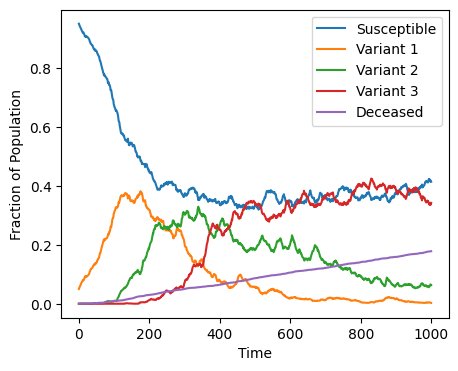

In [3]:
# networks = ["hetero_cc_0.05","hetero_cc_0.5","hetero_cc_0.34",
#             "hetero_deg_var_4.46","hetero_deg_var_8.76","hetero_deg_var_30.35",
#             "homog_regular"]#"homog_comp"

networks = ["influence_nw"]

for network in networks:
    path = "data/networks"
    header = os.path.join(path, f"{network}.txt")
    G = nx.read_edgelist(header)

    mapping = {node: i for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)

    n_nodes = G.number_of_nodes()


    beta_1 = 0.115
    beta_2 = beta_1 * 9/8
    beta_3 = beta_2 * 10/9
    gamma = 0.05
    delta = 0.0005
    mu = 0.0005
    I0 = 0.05
    S0 = 1 - I0
    max_time = 1000
    runs = 50

    cumulative_S = np.zeros(max_time + 1)
    cumulative_I1 = np.zeros(max_time + 1)
    cumulative_I2 = np.zeros(max_time + 1)
    cumulative_I3 = np.zeros(max_time + 1)
    cumulative_D = np.zeros(max_time + 1)
    cumulative_R0_2 = np.zeros(max_time + 1)
    cumulative_R0_3 = np.zeros(max_time + 1)

    fixed_2 = 0
    fixed_3 = 0

    for i in tqdm(range(runs)):
        results, R0_2, R0_3 = network_SISD(G, n_nodes, beta_1, beta_2, beta_3, gamma, delta, mu, S0, I0, max_time)
        t, S, I1, I2, I3, D = zip(*results)

        cumulative_S = np.add(cumulative_S, S)
        cumulative_I1 = np.add(cumulative_I1, I1)
        cumulative_I2 = np.add(cumulative_I2, I2)
        cumulative_I3 = np.add(cumulative_I3, I3)
        cumulative_D = np.add(cumulative_D, D)
        cumulative_R0_2 = np.add(cumulative_R0_2, R0_2)
        cumulative_R0_3 = np.add(cumulative_R0_3, R0_3)

        if I1[max_time]  == 0:
            if I2[max_time] == 0:
                fixed_3 += 1
            else:
                fixed_2 += 1

    average_S = cumulative_S / runs
    average_I1 = cumulative_I1 / runs
    average_I2 = cumulative_I2 / runs
    average_I3 = cumulative_I3 / runs
    average_D = cumulative_D / runs
    average_R0_2 = cumulative_R0_2 / runs
    average_R0_3 = cumulative_R0_3 / runs

    fixed_2 = fixed_2 / runs
    fixed_3 = fixed_3 / runs


    degrees = [d for n, d in G.degree()]
    first_moment = sum(degrees) / len(degrees)
    second_moment = sum(d**2 for d in degrees) / len(degrees)
    
    R0_1 = beta_1 / (delta + gamma + mu)
    per_1 = beta_1 / R0_1
    per_2 = beta_2 / R0_2
    per_3 = beta_3 / R0_3

    if ("homog" in network):
        lambda_c = 1 / first_moment
    else:
        lambda_c = first_moment / (second_moment - first_moment)

    r0_eff_1 = R0_1 / lambda_c
    r0_eff_2 = R0_2 / lambda_c
    r0_eff_3 = R0_3 / lambda_c

    per_eff_1 = per_1 * lambda_c
    per_eff_2 = per_2 * lambda_c
    per_eff_3 = per_3 * lambda_c

    epidemic_size = 1 - average_S[max_time]

    peak_infection = max(average_I1 + average_I2 + average_I3)
    peak_time = np.argmax(average_I1 + average_I2 + average_I3)

    metrics = f"Betas: {beta_1}, {beta_2}, {beta_3}\n\
    \n\
    R0 effective 1: {r0_eff_1}\n\
    R0 effective 2: {r0_eff_2}\n\
    R0 effective 3: {r0_eff_3}\n\
    \n\
    Epidemic size: {epidemic_size}\n\
    \n\
    Peak infection: {peak_infection}\n\
    Peak time: {peak_time}\n\
    \n\
    Percolation threshold 1: {per_eff_1}\n\
    Percolation threshold 2: {per_eff_2}\n\
    Percolation threshold 3: {per_eff_3}"

    plt.figure(figsize=(5,4))
    plt.plot(t, S, label="Susceptible")
    plt.plot(t, I1, label="Variant 1")
    plt.plot(t, I2, label="Variant 2")
    plt.plot(t, I3, label="Variant 3")
    plt.plot(t, D, label="Deceased")

    plt.xlabel("Time")
    plt.ylabel("Fraction of Population")
    plt.legend()

    # print(metrics)
    # plt.show()

    output_dir = "results_final"
    output_path = os.path.join(output_dir, network)

    with open(f"{output_path}.txt", "w") as f:
        f.write(metrics)

    plt.savefig(f"{output_path}.png")

In [ ]:
# print("Probablity of fixation for variant 2: ", fixed_2)
# print("Probablity of fixation for variant 3: ", fixed_3)

# r21 = beta_2 / beta_1
# selection_2 = np.emath.logn(r21, 1 / (1 - fixed_2))
# r31 = beta_3 / beta_1
# selection_3 = np.emath.logn(r31, 1 / (1 - fixed_3))
# print()
# print("Selection exponent for variant 2: ", selection_2)
# print("Selection exponent for variant 3: ", selection_3)

In [ ]:
# print("Regime 1:")
# per_1 = gamma + delta + mu
# r0_1 = beta_1 / per_1
# print("Variant 1 R0: ", r0_1)
# print("Variant 1 percolation threshold: ", per_1)

# print()
# print("Regime 2:")
# per_1 = gamma + delta + beta_2 + mu
# per_2 = gamma + delta + mu
# r0_1 = beta_1 / per_1
# r0_2 = beta_2 / per_2
# print("Variant 1 R0: ", r0_1)
# print("Variant 1 percolation threshold: ", per_1)
# print("Variant 2 R0: ", r0_2)
# print("Variant 2 percolation threshold: ", per_2)

# print()
# print("Regime 3:")
# per_1 = gamma + delta + beta_2 + beta_3 + mu
# per_2 = gamma + delta + beta_3 + mu
# per_3 = gamma + delta
# r0_1 = beta_1 / per_1
# r0_2 = beta_2 / per_2
# r0_3 = beta_3 / per_3
# print("Variant 1 R0: ", r0_1)
# print("Variant 1 percolation threshold: ", per_1)
# print("Variant 2 R0: ", r0_2)
# print("Variant 2 percolation threshold: ", per_2)
# print("Variant 3 R0: ", r0_3)
# print("Variant 3 percolation threshold: ", per_3)